# Implementación Cálculo IIE_PENSER

En este paso subimos el archivo Excel a Colab, importamos las herramientas que vamos a usar para manejar tablas y hacer gráficos, leemos ese archivo en una tabla llamada df. Para comprobar que todo quedó bien, mostramos las primeras 5 filas con df.head().

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set_theme(style="whitegrid")
pd.options.display.max_columns = 50

df = pd.read_excel(list(uploaded.keys())[0])

df.head()


Saving DATA DEPURADA SANTO TOMAS_ESTUDIO PENSER_MAYO DE 2025.xlsx to DATA DEPURADA SANTO TOMAS_ESTUDIO PENSER_MAYO DE 2025.xlsx


,Marca temporal,"Consentimiento de tratamiento de datos personales\nDe acuerdo con la política de tratamiento de datos personales, se informa que la información consignada en el presente formulario será usada únicamente con fines académicos e investigativos, salvaguardando",Número de documento de identificación,Universidad,Sede o Seccional,PROGRAMA ACADEMICO,País en el cual cursó sus estudios,Ciudad en la cual cursó sus estudios (Escríbala en mayúscula y sin tildes),País de residencia actual (Escríbalo en mayúscula y sin tildes),Año de graduación,I.1. ¿Se encuentra laborando actualmente?,I.2.1. Nombre de la organización,I.2.2. Tipo de vinculación,I.2.3. Cargo actual,I.2.4. Tipo de cargo,"Indique el nivel de logro en el que la formación recibida durante sus estudios favoreció el desarrollo de las competencias profesionales, requeridas en los diferentes campos de su desempeño y pertinentes con las necesidades de los contextos locales, regio","Indique el nivel de logro en el que la formación recibida durante sus estudios favoreció el desarrollo de las competencias profesionales, requeridas en los diferentes campos de su desempeño y pertinentes con las necesidades de los contextos locales, re2","Indique el nivel de logro en el que la formación recibida durante sus estudios favoreció el desarrollo de las competencias profesionales, requeridas en los diferentes campos de su desempeño y pertinentes con las necesidades de los contextos locales, re3","Indique el nivel de logro en el que la formación recibida durante sus estudios favoreció el desarrollo de las competencias profesionales, requeridas en los diferentes campos de su desempeño y pertinentes con las necesidades de los contextos locales, re4","Indique el nivel de logro en el que la formación recibida durante sus estudios favoreció el desarrollo de las competencias profesionales, requeridas en los diferentes campos de su desempeño y pertinentes con las necesidades de los contextos locales, re5",I.4. Indique su percepción frente a la siguiente afirmación: “El programa académico del cual me gradué es pertinente con relación a las demandas del entorno social y académico”,I.4.I. ¿Considera que las competencias y habilidades adquiridas durante su formación universitaria han sido suficientes para enfrentar los desafíos y exigencias del entorno laboral actual?,I.5. ¿Ha recibido distinciones o premios?,I.5.1. Nombre la última distinción que recibió y la entidad que la otorga,I.5.2. Año de la distinción,...,III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 1],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 2],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 3],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 4],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 5],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 6],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 7],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 8],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 9],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 10],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 11],III.15.12. Nivel máximo de escolaridad alcanzado por sus hermanos [Hermano 12],III.16. ¿Cuál es su posición en términos del orden de nacimiento?,III.17. Nivel máximo de escolaridad alcanzado por sus padres [Madre],III.17. Nivel máximo de escolaridad alcanzado por sus padres [Padre],III.18. ¿El valor actual de sus ingresos mensuales es superior al valor de los ingresos mensuales durante su último año de estudio?,III.19. Considera Ud. que su ingreso actual es:,"III. 19.1 ¿Considera que las condiciones de su vivienda (infraestructura, ubicación, servicios básicos, entre otros) han mejorado desde que obtuvo su título universitario?","IV.20. Ind

Creamos una función que calcula el puntaje de cada componente (FD, DCI, MS o PMCV) para cada persona. La función recibe: la tabla (df), la lista de preguntas del bloque y un diccionario de puntajes (mapping) que dice cuántos puntos vale cada respuesta. Para cada pregunta, convierte la respuesta en puntos (por ejemplo “De acuerdo” → 0.03) y los va sumando. Si falta una respuesta, cuenta 0. Al final, devuelve una columna con el total de puntos del bloque para cada egresado.

In [3]:
import pandas as pd
import numpy as np

# ------------------------------
# 1. Función auxiliar
# ------------------------------
def calcular_componente(df, preguntas, mapping):
    comp = pd.Series(0, index=df.index, dtype=float)
    for p in preguntas:
        if p in df.columns:
            if p in mapping:  # si la columna tiene un diccionario de valores
                comp += df[p].map(mapping[p]).fillna(0)
    return comp

Listamos las preguntas es decir los nombres exactos de las columnas del Excel que pertenecen a cada componente del índice: FD, DCI, MS y PMCV. Estas listas le dicen a la función del paso anterior qué preguntas debe leer y sumar en cada bloque.

In [83]:
# ------------------------------
# 2. Definir listas de preguntas
# ------------------------------

preguntas_FD = [
    "I.1. ¿Se encuentra laborando actualmente? ",
    "I.2.2. Tipo de vinculación",
    "I.2.4. Tipo de cargo",
    "I.4. Indique su percepción frente a la siguiente afirmación: “El programa académico del cual me gradué es pertinente con relación a las demandas del entorno social y académico” ",
]

preguntas_DCI = [
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [COMUNICACIÓN EFECTIVA: expresar con claridad, y en forma apropiada al contexto y la cultura, lo q",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [RELACIONES INTERPERSONALES: establecer y conservar relaciones significativas, así como ser capaz ",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [TOMA DE DECISIONES: evaluar distintas alternativas, teniendo en cuenta necesidades, capacidades, ",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [SOLUCIÓN DE PROBLEMAS Y CONFLICTOS: transformar y manejar los problemas y conflictos de la vida d",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [PENSAMIENTO CREATIVO: usar la razón y la “pasión” (emociones, sentimientos, intuición, fantasías ",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [PENSAMIENTO CRÍTICO: aprender a preguntarse, investigar y no aceptar las cosas de forma crédula. ",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MANEJO DE EMOCIONES Y SENTIMIENTOS: aprender a navegar en el mundo afectivo logrando mayor “sinto",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MANEJO DE TENSIONES Y ESTRÉS: identificar oportunamente las fuentes de tensión y estrés en la vid",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MULTICULTURALES: tener conocimiento u comprensión de distintas culturas.]",
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [INTERCULTURALES: buenas actitudes que se mantienen hacia otras culturas.]",
]

preguntas_MS = [
    "III.12. En cuanto a su nivel de responsabilidad económica en el hogar, usted se identifica como: ",
    "III.17.  Nivel máximo de escolaridad alcanzado por sus padres  [Madre]",
    "III.17.  Nivel máximo de escolaridad alcanzado por sus padres  [Padre]",
    "III.18. ¿El valor actual de sus ingresos mensuales es superior al valor de los ingresos mensuales durante su último año de estudio? ",
]

preguntas_PMCV = [
    "IV.20.  Indique su apreciación frente a la siguiente afirmación: “La formación recibida en la universidad ha sido un aspecto determinante en el mejoramiento de mi calidad de vida\".  ",
    "III. 19.1 ¿Considera que las condiciones de su vivienda (infraestructura, ubicación, servicios básicos, entre otros) han mejorado desde que obtuvo su título universitario?",
]


Metodologia A

En este bloque armamos la tabla de puntajes, entonces para cada pregunta definimos cuánto vale cada respuesta según el artículo. Con este diccionario, luego el código puede traducir las respuestas en números y sumarlos por bloque.

In [84]:
# ------------------------------
# 3. Definir mappings
# ------------------------------

# --- Metodología A (según artículo, valores originales simplificados como ejemplo)
mapping_a = {
    "I.1. ¿Se encuentra laborando actualmente? ": {"Sí": 0.03, "No": 0.00},
    "I.2.2. Tipo de vinculación": {"Contrato laboral": 0.05, "Prestación de servicios": 0.03, "Otro": 0.01},
    "I.2.4. Tipo de cargo": {"Directivo": 0.05, "Profesional": 0.03, "Técnico": 0.02, "Otro": 0.01},
    "I.4. Indique su percepción frente a la siguiente afirmación: “El programa académico del cual me gradué es pertinente con relación a las demandas del entorno social y académico” ": {"Totalmente de acuerdo": 0.05, "De acuerdo": 0.03, "Neutral": 0.01, "En desacuerdo": 0},

    # Competencias transversales (escala 1-5)
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [COMUNICACIÓN EFECTIVA: expresar con claridad, y en forma apropiada al contexto y la cultura, lo q": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [RELACIONES INTERPERSONALES: establecer y conservar relaciones significativas, así como ser capaz ": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [TOMA DE DECISIONES: evaluar distintas alternativas, teniendo en cuenta necesidades, capacidades, ": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [SOLUCIÓN DE PROBLEMAS Y CONFLICTOS: transformar y manejar los problemas y conflictos de la vida d": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [PENSAMIENTO CREATIVO: usar la razón y la “pasión” (emociones, sentimientos, intuición, fantasías ": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [PENSAMIENTO CRÍTICO: aprender a preguntarse, investigar y no aceptar las cosas de forma crédula. ": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MANEJO DE EMOCIONES Y SENTIMIENTOS: aprender a navegar en el mundo afectivo logrando mayor “sinto": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MANEJO DE TENSIONES Y ESTRÉS: identificar oportunamente las fuentes de tensión y estrés en la vid": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [MULTICULTURALES: tener conocimiento u comprensión de distintas culturas.]": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},
    "II 9. A partir de la siguiente escala indique el nivel en que la Universidad favoreció en usted el desarrollo de las siguientes competencias transversales.  [INTERCULTURALES: buenas actitudes que se mantienen hacia otras culturas.]": {"Muy alto": 0.03, "Alto": 0.024, "Medio": 0.018, "Bajo": 0.012, "Muy bajo": 0.006, "No aplica": 0.00},

    # MS
    "III.12. En cuanto a su nivel de responsabilidad económica en el hogar, usted se identifica como: ": {"Proveedor económico principal": 0.03, "Co-proveedor económico": 0.03, "Dependiente económico": 0.00},
    "III.18. ¿El valor actual de sus ingresos mensuales es superior al valor de los ingresos mensuales durante su último año de estudio?": {"Si": 0.03, "No": 0.00},

    # PMCV
    "IV.20.  Indique su apreciación frente a la siguiente afirmación: “La formación recibida en la universidad ha sido un aspecto determinante en el mejoramiento de mi calidad de vida\".  ": {"Muy alto": 0.28, "Alto": 0.24, "Totalmente de acuerdo": 0.2, "De acuerdo": 0.16, "Ni de acuerdo ni en desacuerdo": 0.12, "En desacuerdo": 0.08, "Totalmente en desacuerdo": 0.04},
}



Aquí creamos dos “ayudantes” para los resúmenes. La primera (maximo_bloque) calcula cuál sería el puntaje máximo posible de un componente, sumando el valor más alto de cada pregunta. La segunda (tabla_detalle_bloque) arma una tablita por pregunta: convierte las respuestas en puntos, calcula el promedio de ese puntaje en todo el grupo y también el % alcanzado frente al máximo de esa pregunta. Con esto luego podemos decir, de forma clara, qué tanto se logró en cada componente y en qué preguntas se está más o menos fuerte.

In [85]:
# ============================================================
# 4. Utilidades para máximos y resúmenes
# ============================================================

def maximo_bloque(preguntas, mapping):
    """
    Suma el máximo posible por pregunta del bloque según 'mapping'.
    Sirve para calcular el % alcanzado de cada componente.
    """
    m = 0.0
    for p in preguntas:
        if p in mapping:
            vals = [v for v in mapping[p].values() if v is not None]
            if len(vals):
                m += max(vals)
    return m

def tabla_detalle_bloque(df, preguntas, mapping):
    """
    Tabla por variable (pregunta): promedio de puntaje y % del máximo de esa pregunta.
    """
    filas = []
    for p in preguntas:
        if p in df.columns and p in mapping:
            s = df[p].map(mapping[p]).fillna(0)
            max_p = max([v for v in mapping[p].values() if v is not None])
            filas.append({
                "Variable": p,
                "Resultado": s.mean(),
                "% alcanzado": 100 * (s.mean() / max_p if max_p > 0 else np.nan)
            })
    return pd.DataFrame(filas)


Convertimos las respuestas en puntos y sacamos los cuatro subíndices: FD, DCI, MS y PMCV cada uno es la suma de los puntajes de sus preguntas. Después calculamos dos índices generales: uno igual a la suma simple de esos cuatro (IIE_A_SUM, que replica el artículo) y otro ponderado (IIE_A), donde damos 30% a FD, 30% a DCI, 20% a MS y 20% a PMCV. Para confirmar que todo quedó bien, mostramos una vista rápida con las primeras filas y los valores de cada subíndice y de ambos índices.

In [86]:
# ============================================================
# 5) Cálculo de subíndices con Metodología A
# ============================================================
df["FD"]   = calcular_componente(df, preguntas_FD,  mapping_a)
df["DCI"]  = calcular_componente(df, preguntas_DCI, mapping_a)
df["MS"]   = calcular_componente(df, preguntas_MS,  mapping_a)
df["PMCV"] = calcular_componente(df, preguntas_PMCV,mapping_a)

# --- Índice final:
# Para replicar el artículo: SUMA simple de los cuatro componentes
df["IIE_A_SUM"] = df["FD"] + df["DCI"] + df["MS"] + df["PMCV"]

pesos = {"FD":0.30, "DCI":0.30, "MS":0.20, "PMCV":0.20}
df["IIE_A"] = (df["FD"]*pesos["FD"] + df["DCI"]*pesos["DCI"] +
               df["MS"]*pesos["MS"] + df["PMCV"]*pesos["PMCV"])

print("Vista rápida (primeras filas):")
display(df[["FD","DCI","MS","PMCV","IIE_A_SUM","IIE_A"]].head())

Vista rápida (primeras filas):


,FD,DCI,MS,PMCV,IIE_A_SUM,IIE_A
0,0.08,0.246,0.03,0.20,0.556,0.1438
1,0.06,0.240,0.03,0.12,0.450,0.1200
2,0.03,0.234,0.03,0.16,0.454,0.1172
3,0.03,0.240,0.03,0.16,0.460,0.1190
4,0.00,0.198,0.03,0.12,0.348,0.0894


Sacamos un resumen general del índice. Primero calculamos, para cada componente (FD, DCI, MS y PMCV), cuál sería el puntaje máximo posible según los valores del artículo. Luego calculamos el promedio real que obtuvieron los egresados en cada componente y, con eso, el porcentaje alcanzado (qué tanto del máximo se logró). Al final añadimos una fila con el resultado total del índice (la suma de los cuatro) y su porcentaje frente al máximo posible. Esta tabla permite ver y comparar de forma sencilla el porcentaje logrado en cada componente y en el total.

In [87]:
# ============================================================
# 6) "Cuadro 2": promedio por componente y % del máximo
# ============================================================

max_FD   = maximo_bloque(preguntas_FD,  mapping_a)
max_DCI  = maximo_bloque(preguntas_DCI, mapping_a)
max_MS   = maximo_bloque(preguntas_MS,  mapping_a)
max_PMCV = maximo_bloque(preguntas_PMCV,mapping_a)

resumen = pd.DataFrame({
    "Componente": ["Formación disciplinar","Desarrollo de competencias interpersonales",
                   "Movilidad social","Percepción de la calidad de vida"]
})
resumen["Resultado"] = [
    df["FD"].mean(),
    df["DCI"].mean(),
    df["MS"].mean(),
    df["PMCV"].mean()
]
resumen["Máximo teórico"] = [max_FD, max_DCI, max_MS, max_PMCV]
resumen["% alcanzado"] = 100 * resumen["Resultado"] / resumen["Máximo teórico"]

# Fila total del índice (suma de componentes)
resumen_total = pd.DataFrame([{
    "Componente": "Resultado",
    "Resultado": df["IIE_A_SUM"].mean(),
    "Máximo teórico": (max_FD + max_DCI + max_MS + max_PMCV),
    "% alcanzado": 100 * df["IIE_A_SUM"].mean() / (max_FD + max_DCI + max_MS + max_PMCV)
}])

print("=== Cuadro 2 — Resumen general (Metodología A, suma de componentes) ===")
display(pd.concat([resumen, resumen_total], ignore_index=True).round(3))


=== Cuadro 2 — Resumen general (Metodología A, suma de componentes) ===


,Componente,Resultado,Máximo teórico,% alcanzado
0,Formación disciplinar,0.051,0.18,28.604
1,Desarrollo de competencias interpersonales,0.231,0.30,77.072
2,Movilidad social,0.026,0.03,86.182
3,Percepción de la calidad de vida,0.151,0.28,53.916
4,Resultado,0.460,0.79,58.168


In [88]:
# ============================================================
# 7) Cuadros de detalle por variable
# ============================================================

print("=== Detalle — Formación disciplinar (FD) ===")
display(tabla_detalle_bloque(df, preguntas_FD, mapping_a).round(3))

print("=== Detalle — Desarrollo de competencias interpersonales (DCI) ===")
display(tabla_detalle_bloque(df, preguntas_DCI, mapping_a).round(3))

print("=== Detalle — Movilidad social (MS) ===")
display(tabla_detalle_bloque(df, preguntas_MS, mapping_a).round(3))

print("=== Detalle — Percepción de la calidad de vida (PMCV) ===")
display(tabla_detalle_bloque(df, preguntas_PMCV, mapping_a).round(3))


=== Detalle — Formación disciplinar (FD) ===


,Variable,Resultado,% alcanzado
0,I.1. ¿Se encuentra laborando actualmente?,0.000,0.000
1,I.2.2. Tipo de vinculación,0.000,0.000
2,I.2.4. Tipo de cargo,0.023,46.554
3,I.4. Indique su percepción frente a la siguien...,0.028,56.422


=== Detalle — Desarrollo de competencias interpersonales (DCI) ===


,Variable,Resultado,% alcanzado
0,II 9. A partir de la siguiente escala indique ...,0.024,79.433
1,II 9. A partir de la siguiente escala indique ...,0.024,78.512
2,II 9. A partir de la siguiente escala indique ...,0.024,79.451
3,II 9. A partir de la siguiente escala indique ...,0.024,78.884
4,II 9. A partir de la siguiente escala indique ...,0.023,77.644
5,II 9. A partir de la siguiente escala indique ...,0.024,80.283
6,II 9. A partir de la siguiente escala indique ...,0.022,73.357
7,II 9. A partir de la siguiente escala indique ...,0.021,71.461
8,II 9. A partir de la siguiente escala indique ...,0.023,75.235
9,II 9. A partir de la siguiente escala indique ...,0.023,76.457


=== Detalle — Movilidad social (MS) ===


,Variable,Resultado,% alcanzado
0,III.12. En cuanto a su nivel de responsabilida...,0.026,86.182


=== Detalle — Percepción de la calidad de vida (PMCV) ===


,Variable,Resultado,% alcanzado
0,IV.20. Indique su apreciación frente a la sig...,0.151,53.916


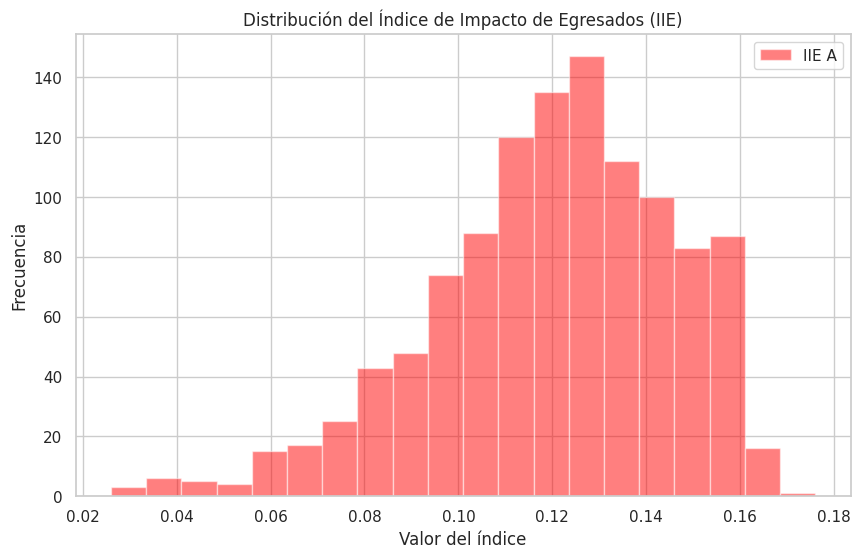

In [50]:
# ===============================
# Histograma
# ===============================
plt.figure(figsize=(10,6))
plt.hist(df["IIE_A"], bins=20, alpha=0.5, label="IIE A", color="red")
plt.title("Distribución del Índice de Impacto de Egresados (IIE)")
plt.xlabel("Valor del índice")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


/tmp/ipython-input-2115162213.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sede o Seccional")


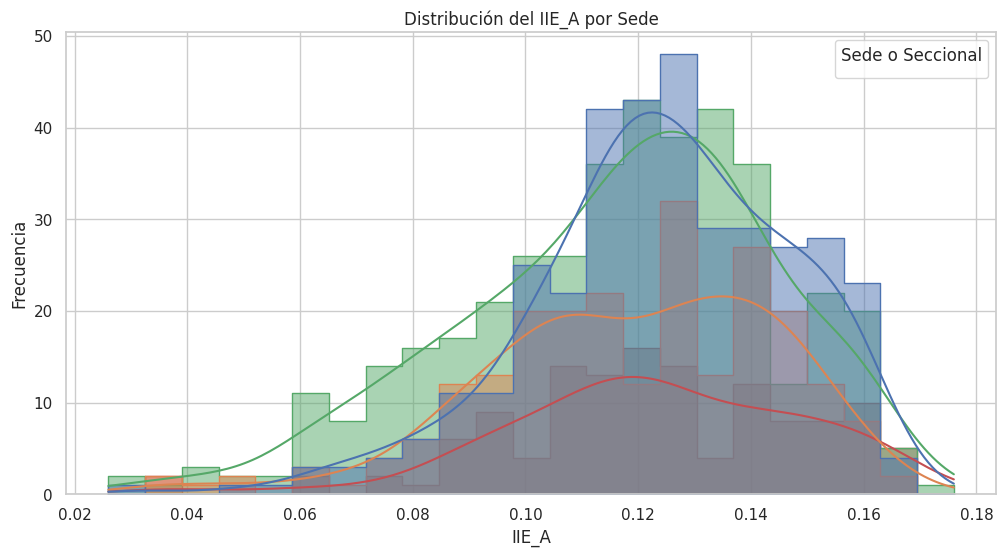

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=df,
             x="IIE_A",
             hue="Sede o Seccional",
             kde=True,
             element="step",
             alpha=0.5)
plt.title("Distribución del IIE_A por Sede")
plt.xlabel("IIE_A")
plt.ylabel("Frecuencia")
plt.legend(title="Sede o Seccional")
plt.show()


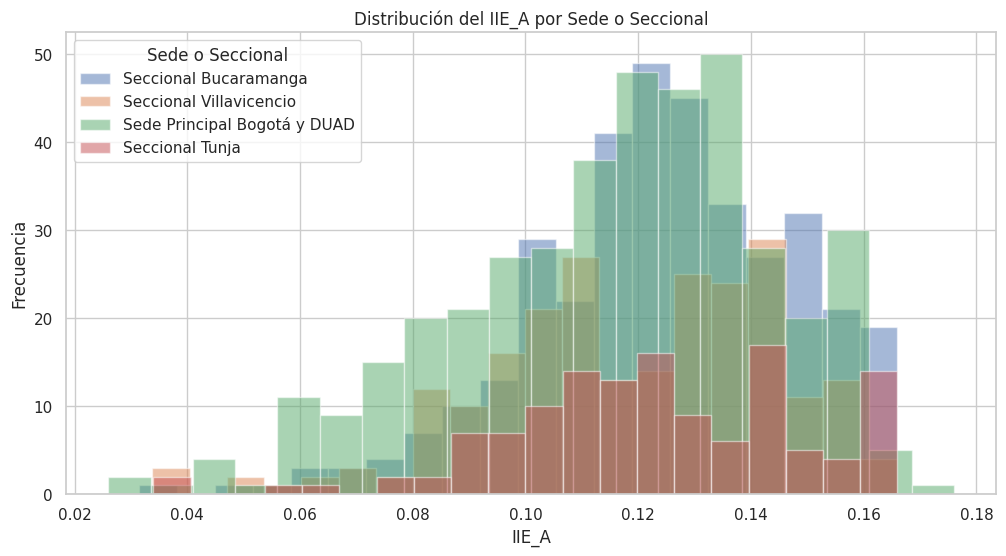

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for sede in df["Sede o Seccional"].dropna().unique():
    plt.hist(df[df["Sede o Seccional"] == sede]["IIE_A"],
             bins=20, alpha=0.5, label=sede)

plt.title("Distribución del IIE_A por Sede o Seccional")
plt.xlabel("IIE_A")
plt.ylabel("Frecuencia")
plt.legend(title="Sede o Seccional")
plt.show()


/tmp/ipython-input-3966815754.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=sedes)


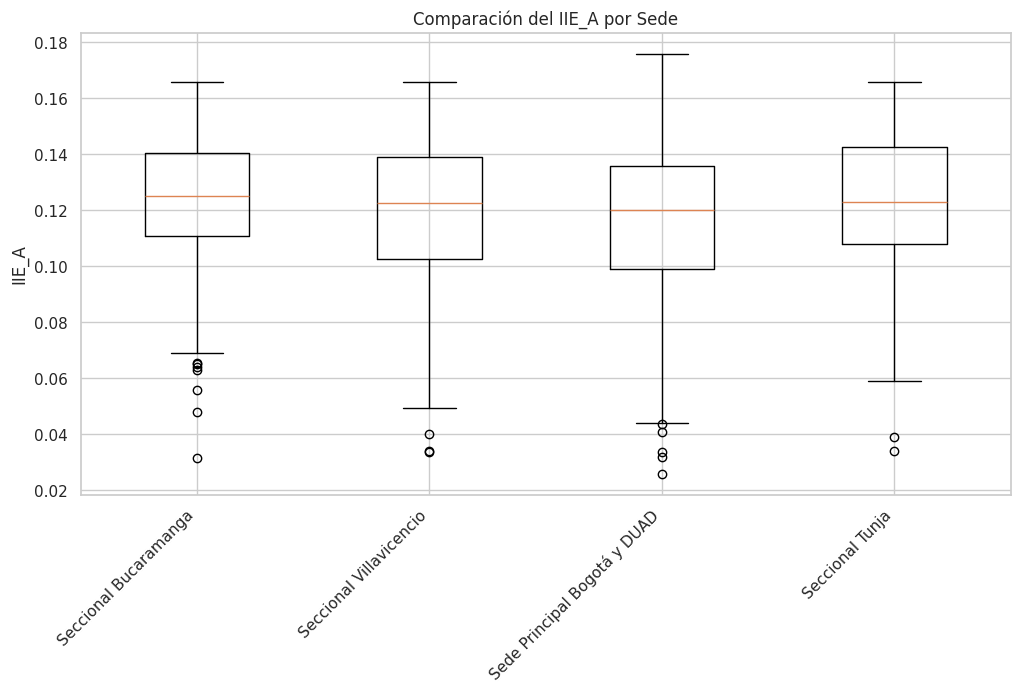

In [62]:
plt.figure(figsize=(12,6))
data = [df[df["Sede o Seccional"] == sede]["IIE_A"] for sede in sedes]
plt.boxplot(data, labels=sedes)
plt.title("Comparación del IIE_A por Sede")
plt.ylabel("IIE_A")
plt.xticks(rotation=45, ha="right")
plt.show()
